In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize': (15, 10)})  #зададим внешний вид графиков
fig = plt.figure()

<Figure size 1080x720 with 0 Axes>

In [187]:
df = pd.read_csv('datasets_27_792993_cwurData.csv')

In [188]:
df.drop(['score', 'year', 'broad_impact'], axis=1, inplace=True) #выбросим ненужные столбцы

In [189]:
df.head(15)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,1,Harvard University,USA,1,7,9,1,1,1,1,5
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1
2,3,Stanford University,USA,3,17,11,5,4,2,2,15
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18
5,6,Princeton University,USA,5,8,14,2,53,33,26,101
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,26
7,8,Yale University,USA,6,14,31,12,14,6,15,66
8,9,Columbia University,USA,7,23,21,10,13,12,14,5
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,16


Построим график взаимосвязи мирового рейтинга с местным рейтингом университета.

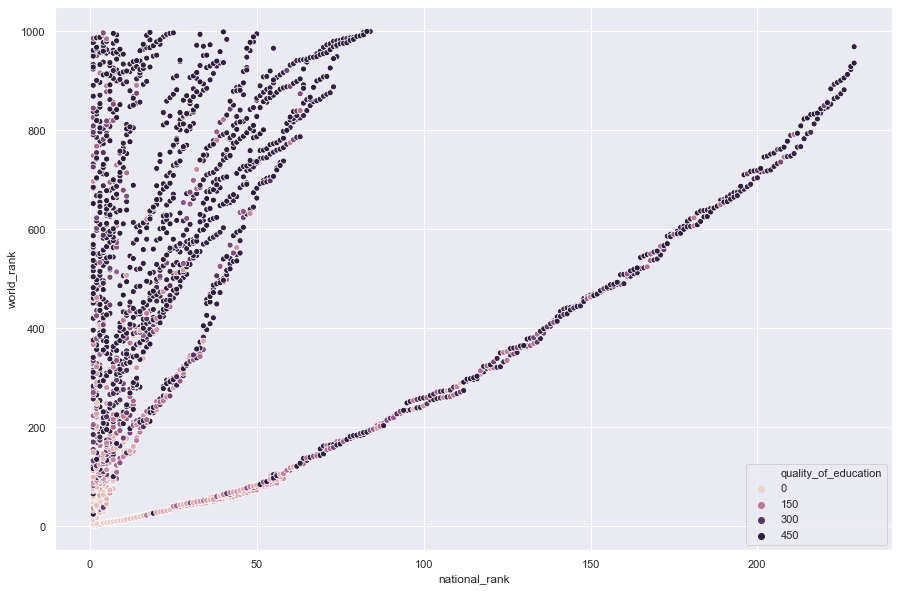

In [190]:
sns.scatterplot(x='national_rank',
                y='world_rank',
                hue='quality_of_education',
                data=df)

Видно, что чем хуже рейтинг университета в стране, тем очевидно он ниже в междунардном рейтинге.  
Но на графике так же отчетливо заметна отделившаяся часть точек, международный рейтинг которых ухудшается не так быстро, как у остальных.  
Попробуем найти взаимосвязь этих точек.

Отметим теперь цветом не качество образования, как в пердыдущем графике, а страну.

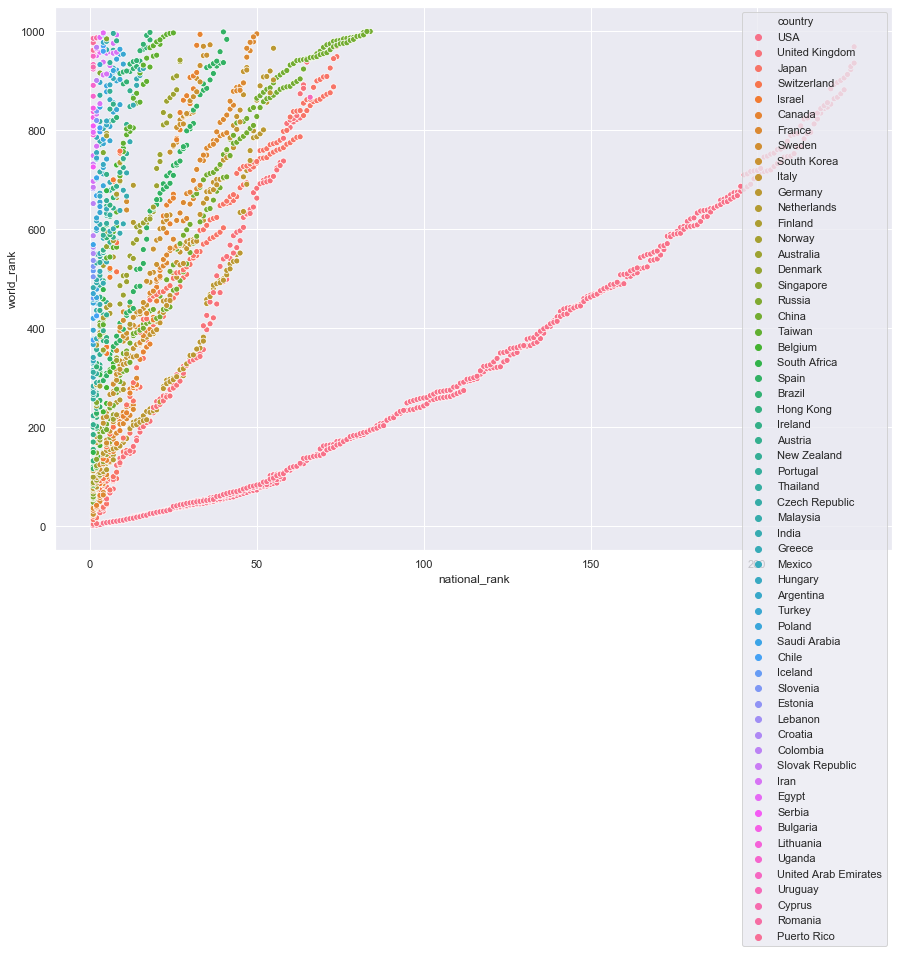

In [191]:
sns.scatterplot(x='national_rank',
                y='world_rank',
                hue='country',
                data=df)

Из этого графика понятно, что эти университеты находятся на територии США.  
Отсюда можно сделать вывод, что количество университетов с высоким международным рейтингом в США значительно выше, чем в других странах.

In [218]:
df.groupby('country', as_index=False).agg({'world_rank': 'mean'}).sort_values(by=['world_rank']).head(10).reset_index()

,index,country,world_rank
0,43,Singapore,101.800000
1,26,Israel,181.590909
2,50,Switzerland,182.038462
3,33,Netherlands,216.862069
4,13,Denmark,232.666667
5,49,Sweden,246.458333
6,54,USA,290.528796
7,20,Hong Kong,347.250000
8,35,Norway,347.250000
9,46,South Africa,361.900000


Однако, выводя топ-10 стран с самым лучшим средним мировым рейтингом, мы видим, что США занимает лишь 7 место.  
Первые три места занимают Сингапур, Израиль и Швейцария соответственно.

Следовательно можно предположить, что в США больше хороших университетов с высоким местом в мировом рейтинге, чем в других странах. При это там также очень много университетов с плохим местом в рейтинге и именно поэтому в топе США занимает лишь 7 место.

Теперь посторим линейную версию прошлого графика.

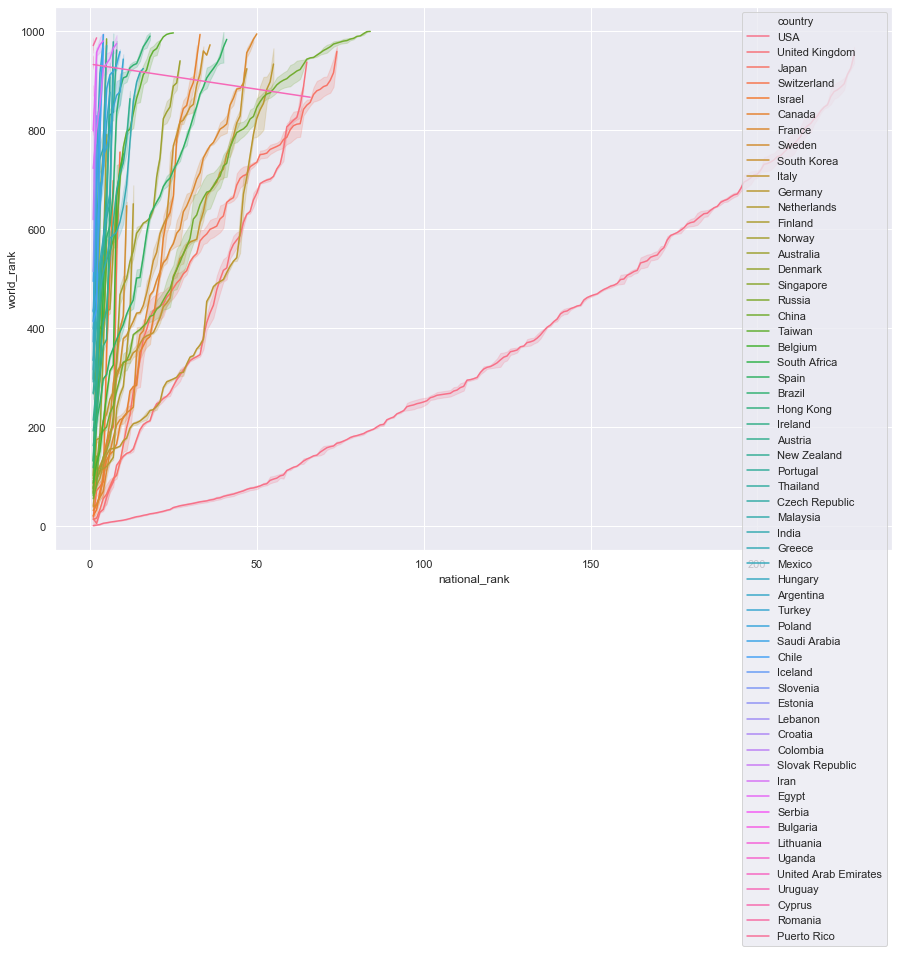

In [192]:
sns.lineplot(x='national_rank',
             y='world_rank',
             hue='country',
             data=df);

Из этого графика видно, что мировые рейтинги университетов всех стран ведут себя примерно одинаково, то есть для каждой страны нет каких-либо резких выбросов, рейтинги меняются достаточно плавно, постепенно склоняясь вправо.

Однако есть одна страна, рейтинги университетов которой ведут себя аномально. При увеличении национального рейтинга уменьшается мировой.  

По этому графику достаточно сложно понять какая именно это страна, так как цвет многих линий очень близок.  
Поэтому отберем страны, линии которых отрисованы розовыми оттенками, и нарисуем такой же график только для них.

In [193]:
selected_countries = ['Uganda', 'Uruguay', 'Cyprus', 'Romania', 'Puerto Rico']

In [194]:
selected_data = df.loc[df['country'].isin(selected_countries)]

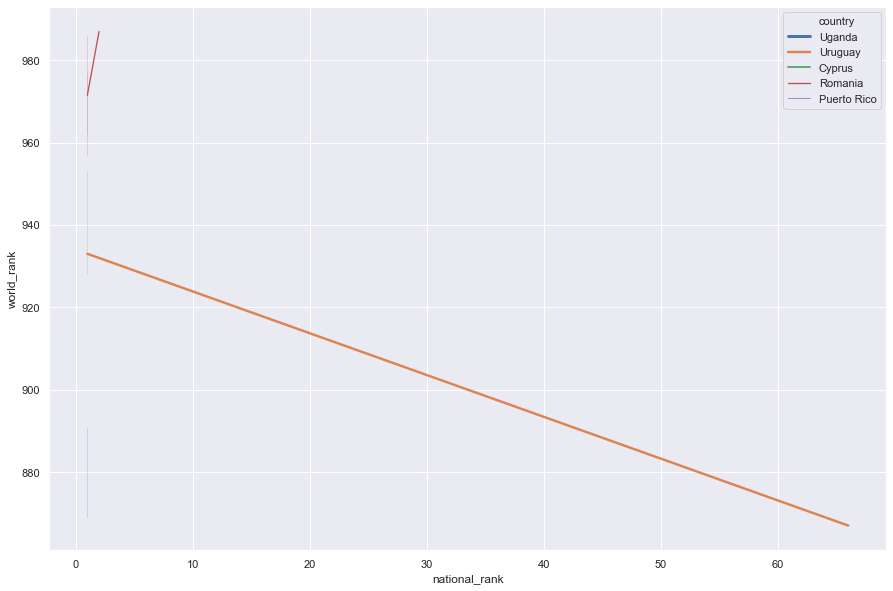

In [195]:
sns.lineplot(x='national_rank',
             y='world_rank', selected_countries=['Uganda', 'Uruguay', 'Cyprus', 'Romania', 'Puerto Rico']
             hue='country',
             data=selected_data, size='country')

Из этого графика видно, что страной с аномальным поведением является Уругвай.